In [11]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import json
%matplotlib inline

In [12]:
ann = [
    0.65642954,
    0.4285264,
    0.25816318,
    0.29223176
]

In [13]:
img = cv2.imread("data/temp_test/stop/0a9beb69-0b62-412c-8e5a-c6b28fc87e11.jpg")
image_width, image_height = img.shape[1], img.shape[0]
x, y, width, height = ann[0], ann[1], ann[2], ann[3]

x_pixel = int(x * image_width)
y_pixel = int(y * image_height)
width_pixel = int(width * image_width)
height_pixel = int(height * image_height)

[ WARN:0@10.162] global loadsave.cpp:244 findDecoder imread_('data/temp_test/stop/0a9beb69-0b62-412c-8e5a-c6b28fc87e11.jpg'): can't open/read file: check file path/integrity


AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
img = cv2.rectangle(img, (x_pixel, y_pixel), (x_pixel + width_pixel, y_pixel + height_pixel), (0, 255, 0), 2)

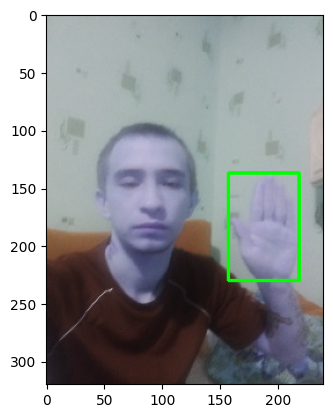

In [ ]:
plt.imshow(img)

In [ ]:
import random

random.seed(42)

id = [1, 2, 3, 4, 5]
bbox = [[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]]
label = ["dog", "cat", "dog", "cat", "dog"]




## Test for cropping

In [22]:
target = "stop"
ann = json.load(open(f"../data/annotation/train/{target}.json", "r"))

In [23]:
img_id = list(ann.keys())[0]

In [24]:
img_id

'0000d39b-5dcc-4bea-b615-644581855295'

In [25]:
img = cv2.imread(f"../data/train/{target}/{img_id}.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
bbox = ann[img_id]["bboxes"][0]

In [26]:
width, height = img.shape[1], img.shape[0]

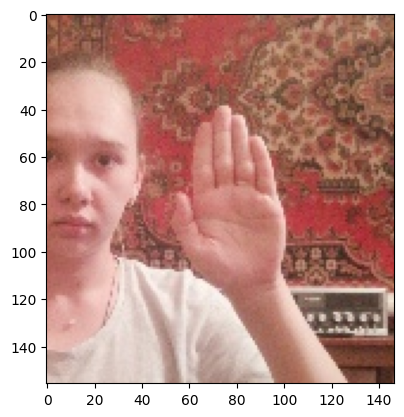

In [27]:
box_scale = 2.0
x1, y1, w, h = bbox
bbox_abs = [x1 * width, y1 * height, (x1 + w) * width, (y1 + h) * height]
int_bbox = np.array(bbox_abs).round().astype(np.int32)
x1 = int_bbox[0]
y1 = int_bbox[1]
x2 = int_bbox[2]
y2 = int_bbox[3]
cx, cy = (x1 + x2) / 2, (y1 + y2) / 2

w = h = max(x2 - x1, y2 - y1)
x1 = max(0, cx - box_scale * w // 2)
y1 = max(0, cy - box_scale * h // 2)
x2 = cx + box_scale * w // 2
y2 = cy + box_scale * h // 2
x1, y1, x2, y2 = list(map(int, (x1, y1, x2, y2)))


crop_image = img[y1:y2, x1:x2]

plt.imshow(crop_image)

In [28]:
# Assuming you have the image_cropped variable as a NumPy array
width = 224
height = 224
desired_size = (width, height)  # Set your desired output size

# Get the dimensions of the cropped image
cropped_height, cropped_width, _ = crop_image.shape

# Determine the scaling factor based on the longest side
side = max(cropped_width, cropped_height)
scale_factor = width / side

# Calculate the new dimensions after scaling
resized_width = int(cropped_width * scale_factor)
resized_height = int(cropped_height * scale_factor)

# Resize the image using cv2.resize()
resized_image = cv2.resize(crop_image, (resized_width, resized_height))

# Create a blank canvas of the desired size with black color
padded_image = np.zeros((height, width, 3), np.uint8)
padded_image[:] = (0, 0, 0)

# Calculate the padding required
pad_top = (height - resized_height) // 2
pad_bottom = height - resized_height - pad_top
pad_left = (width - resized_width) // 2
pad_right = width - resized_width - pad_left

# Perform the padding using cv2.copyMakeBorder()
image_resized = cv2.copyMakeBorder(resized_image, pad_top, pad_bottom, pad_left, pad_right, cv2.BORDER_CONSTANT, value=(0, 0, 0))


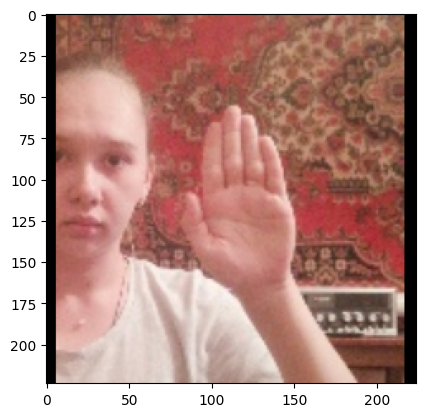

In [31]:
plt.imshow(image_resized)

In [37]:
from torchvision import transforms
to_tensor = transforms.ToTensor()
normalized = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

In [40]:
image_resized[0]

array([[  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [144,  92,  79],
       [140,  88,  73],
       [138,  84,  68],
       [141,  86,  66],
       [140,  81,  60],
       [144,  83,  62],
       [155,  93,  72],
       [138,  76,  59],
       [140,  78,  63],
       [152,  89,  74],
       [150,  83,  67],
       [156,  86,  69],
       [162,  91,  73],
       [162,  93,  73],
       [153,  89,  69],
       [139,  83,  65],
       [122,  75,  59],
       [109,  68,  53],
       [104,  65,  51],
       [104,  66,  53],
       [109,  69,  57],
       [109,  65,  53],
       [107,  59,  46],
       [103,  55,  40],
       [113,  65,  48],
       [116,  71,  52],
       [107,  65,  43],
       [105,  65,  43],
       [107,  69,  48],
       [113,  75,  57],
       [111,  71,  55],
       [109,  67,  55],
       [106,  63,  55],
       [100,  61,  52],
       [ 96,  60,  51],
       [ 96,  63

In [45]:
image_tensor = to_tensor(image_resized)
normalized_image = image_tensor/255.0
normalized_image.shape

torch.Size([3, 224, 224])

In [ ]:
from omegaconf import OmegaConf


conf = OmegaConf.load("configs/default.yaml")

In [ ]:
a,b = conf.dataset.image_size

# collection defaultdict

In [22]:
from collections import defaultdict
import torch

In [3]:
predicts, targets = defaultdict(list), defaultdict(list)

In [8]:
predicts["a"] += [1, 2, 3]

In [9]:
predicts

defaultdict(list, {'a': [1, 2, 3, 1, 2, 3, 1, 2, 3]})

In [18]:
a = [1, 2, 3, 4, 5]
b = [[1, 2, 3, 4, 5], [1, 2, 3, 4, 5], 8[1, 2, 3, 4, 5], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5]]

In [23]:
torch_a = torch.tensor(a)

In [25]:
torch.max(torch_a, 0)

torch.return_types.max(
values=tensor(5),
indices=tensor(4))

In [1]:
import wandb

wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin


True

In [3]:
#relogin
wandb.login(relogin=True)


wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:


Abort: 